### Import needed libraries

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

### Function for counting rows with shared values

In [68]:
def count_shared_values(df, col1, col2, val1, val2):
    shared_count = len(df[(df[col1] == val1) & (df[col2] == val2)])
    return shared_count


### Read in .csv file

In [69]:
df = pd.read_csv('assets/railroad_data.csv', low_memory=False)
df.head(10)

,Reporting Railroad Name,Maintenance Railroad Name,Date,Accident Type,Hazmat Released Cars,Persons Evacuated,State Abbreviation,State Name,Weather Condition,Equipment Type Code,...,Gross Tonnage,Remote Control Locomotive Code,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Equipment Damage Cost,Primary Accident Cause,Hours Engineers On Duty,Total Persons Killed,Class
0,Northern Indiana Commuter Transportation District,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,06/06/2017,Derailment,0.0,149.0,IL,ILLINOIS,Clear,3,...,0.0,0.0,0.0,0.0,Yes,98627.0,Switch point worn or broken,1.0,0.0,No
1,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,06/06/2017,Derailment,0.0,0.0,IL,ILLINOIS,Clear,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,Switch point worn or broken,NaN,0.0,No
2,Conrail,Conrail,04/06/1981,Side collision,0.0,0.0,NY,NEW YORK,Snow,5,...,0.0,NaN,0.0,0.0,No,4000.0,Cars left foul,NaN,0.0,1L
3,Illinois Central Railroad Company,Cargill Elevator,01/11/2007,Derailment,0.0,0.0,LA,LOUISIANA,Cloudy,1,...,14100.0,0.0,NaN,NaN,No,5220.0,Switch damaged or out of adjustment,10.0,0.0,1L
4,Illinois Central Railroad Company,Illinois Central Railroad Company,10/07/2017,Hwy-rail crossing,0.0,0.0,IL,ILLINOIS,Clear,1,...,3482.0,0.0,NaN,NaN,No,13000.0,Highway user deliberately disregarded crossing...,8.0,0.0,Cl
5,Norfolk Southern Railway Company,Norfolk Southern Railway Company,10/15/2017,Derailment,0.0,0.0,IL,ILLINOIS,Rain,1,...,6706.0,0.0,0.0,0.0,No,7418.0,"Shoving movement, absence of man on or at lead...",2.0,0.0,CL
6,Union Pacific Railroad Company,Union Pacific Railroad Company,12/04/2017,Obstruction,0.0,0.0,IL,ILLINOIS,Cloudy,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,Object or equipment on or fouling track - othe...,NaN,0.0,CL
7,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,12/19/2016,Other (describe in narrative),0.0,0.0,IL,ILLINOIS,Clear,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,Other miscellaneous causes (Provide detailed d...,NaN,0.0,No
8,Indiana Harbor Belt Railroad Company,Indiana Harbor Belt Railroad Company,03/30/2017,Derailment,0.0,0.0,IL,ILLINOIS,Rain,7,...,2399.0,0.0,NaN,NaN,NaN,390870.0,Broken Rail - Base [Desc.Changed-Refer to Curr...,2.0,0.0,Cl
9,BNSF Railway Company,BNSF Railway Company,04/06/2017,Derailment,0.0,0.0,IL,ILLINOIS,Clear,1,...,15760.0,0.0,0.0,0.0,No,750.0,Damaged flange or tread (build up),9.0,0.0,CL


### Drop columns that I don't need 

In [70]:
df.drop(['Class', 'Hours Engineers On Duty', 
         'Maintenance Railroad Name', 
         'Equipment Attended', 
         'Positive Drug Tests', 
         'Positive Alcohol Tests',
         'Remote Control Locomotive Code',
         'Primary Accident Cause'
         ],  axis=1, inplace=True)


### Check DataFrame dtypes

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215849 entries, 0 to 215848
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Reporting Railroad Name  215846 non-null  object 
 1   Date                     215847 non-null  object 
 2   Accident Type            215847 non-null  object 
 3   Hazmat Released Cars     215848 non-null  float64
 4   Persons Evacuated        215848 non-null  float64
 5   State Abbreviation       215848 non-null  object 
 6   State Name               215848 non-null  object 
 7   Weather Condition        215454 non-null  object 
 8   Equipment Type Code      204640 non-null  object 
 9   Train Speed              215846 non-null  float64
 10  Gross Tonnage            215848 non-null  float64
 11  Passengers Transported   205176 non-null  object 
 12  Equipment Damage Cost    215848 non-null  float64
 13  Total Persons Killed     215848 non-null  float64
dtypes: f

### Rename columns

In [72]:
df.rename(columns= {'Equipment Type Code': 'Equipment', 
'Weather Condition': 'Weather', 
'Train Speed': 'Speed', 
'State Abbreviation': 'State_Abv',
'Reporting Railroad Name': 'Railroad', 
'State Name': 'State',
'Equipment Damage Cost': 'Damage',
'Primary Accident Cause': 'Cause',
'Passengers Transported': 'Passengers',
'Accident Type': 'Accident_Type',
'Persons Evacuated': 'Evacuated',
'Positive Alcohol Tests': 'Alcohol_Test',
'Positive Drug Tests': 'Drug_Test',
'Hazmat Released Cars': 'Spill_Cars',
'Total Persons Killed': 'Killed',
'Gross Tonnage': 'Tonnage'}, inplace=True)

### Dropping passenger rail incidents

In [73]:
passenger_trians = [2, 3, 'B', 'C', 'EMU', 'DMU']

df = df[df.Equipment.isin(passenger_trians) == False]

In [74]:
df.drop(df.loc[df['Passengers']=='Yes'].index, inplace=True)

### Only needed Equipment and Passengers to drop all but freight

In [75]:
df.drop('Equipment', axis=1, inplace=True)
df.drop('Passengers', axis=1, inplace=True)        

### Any rows with NaN for railroad name or date is a error

In [76]:
df.dropna(subset=['Railroad', 'Date'], inplace=True)

### Fill NaN with usable values

In [77]:
df.Weather = df.Weather.fillna('Unknown')
df.Accident_Type = df.Accident_Type.fillna('Unknown')
df.Speed = df.Speed.fillna(0)

### Change data types

In [78]:
df = df.astype({'Tonnage': 'Int64', 'Damage': 'Int64', 
'Killed': 'Int64', 'Speed': 'Int64',
'Spill_Cars': 'Int64',
'Evacuated': 'Int64'})
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 208704 entries, 1 to 215848
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Railroad       208704 non-null  object        
 1   Date           208704 non-null  datetime64[ns]
 2   Accident_Type  208704 non-null  object        
 3   Spill_Cars     208704 non-null  Int64         
 4   Evacuated      208704 non-null  Int64         
 5   State_Abv      208704 non-null  object        
 6   State          208704 non-null  object        
 7   Weather        208704 non-null  object        
 8   Speed          208704 non-null  Int64         
 9   Tonnage        208704 non-null  Int64         
 10  Damage         208704 non-null  Int64         
 11  Killed         208704 non-null  Int64         
dtypes: Int64(6), datetime64[ns](1), object(5)
memory usage: 21.9+ MB


### Dropping the one canadian owned railroad

In [79]:
df = df[~df['Railroad'].str.contains('Illinois Central Gulf Railroad Company')]

### Dropping all but the major class 1 railroads

In [80]:
value_counts = df['Railroad'].value_counts()
to_remove = value_counts[value_counts <= 4120].index
df = df[~df.Railroad.isin(to_remove)]
df.Railroad.value_counts()

Union Pacific Railroad Company                 30701
BNSF Railway Company                           15547
CSX Transportation                             13477
Burlington Northern Railroad Company           13327
Conrail                                        12487
Southern Pacific Transportation Company         8896
Norfolk Southern Railway Company                8452
Chicago And North Western Railway Company       7743
Atchison, Topeka & Santa Fe Railway Company     5398
Louisville And Nashville Railroad Company       4141
Name: Railroad, dtype: int64

### Correcting the railroad names.

In [81]:
replace_dict = {'BNSF Railway Company': 'BNSF',
                'Burlington Northern Railroad Company': 'BNSF',
                'Conrail': 'Norfolk Southern',
                'Norfolk Southern Railway Company': 'Norfolk Southern',
                'Union Pacific Railroad Company': 'Union Pacific',
                'Southern Pacific Transportation Company': 'Union Pacific',
                'Atchison, Topeka & Santa Fe Railway Company': 'BNSF',
                'Chicago And North Western Railway Company': 'Union Pacific',
                'CSX Transportation': 'CSX',
                'Louisville And Nashville Railroad Company': 'CSX'}
df['Railroad'] = df['Railroad'].replace(replace_dict)

### Checking that the rename worked

In [82]:

value_counts = df['Railroad'].value_counts()

df.Railroad.value_counts()

Union Pacific       47340
BNSF                34272
Norfolk Southern    20939
CSX                 17618
Name: Railroad, dtype: int64

### Sorting by date

In [83]:
df.sort_values(by=['Date'], inplace=True)

### Reset index

In [84]:
df = df.reset_index(drop=True)

### Calling my shared_count function to see that Kentucky has a total of 1928 derailments in this dataframe

In [85]:
shared_count = count_shared_values(df, 'Accident_Type', 'State', 'Derailment', 'KENTUCKY')
shared_count

1928

## CSX has had 10956 total derailments

In [86]:
shared_count = count_shared_values(df, 'Railroad', 'Accident_Type', 'CSX', 'Derailment')
shared_count

10956

## Union Pacific has 30733 total derailments

In [87]:
shared_count = count_shared_values(df, 'Railroad', 'Accident_Type', 'Union Pacific', 'Derailment')
shared_count

30733

## BNSF has 21488 total derailments

In [88]:
shared_count = count_shared_values(df, 'Railroad', 'Accident_Type', 'BNSF', 'Derailment')
shared_count

21488

## Norfolk Southern has 13617 total derailments

In [89]:
shared_count = count_shared_values(df, 'Railroad', 'Accident_Type', 'Norfolk Southern', 'Derailment')
shared_count

13617

In [90]:
df

,Railroad,Date,Accident_Type,Spill_Cars,Evacuated,State_Abv,State,Weather,Speed,Tonnage,Damage,Killed
0,BNSF,1975-01-01,Derailment,0,0,CA,CALIFORNIA,Cloudy,0,0,1800,0
1,BNSF,1975-01-01,Derailment,0,0,AZ,ARIZONA,Cloudy,12,3826,5000,0
2,Union Pacific,1975-01-01,Derailment,0,0,IL,ILLINOIS,Clear,5,0,1400,0
3,Union Pacific,1975-01-02,Derailment,0,0,KS,KANSAS,Snow,45,6843,400,0
4,Union Pacific,1975-01-02,Derailment,0,0,ID,IDAHO,Cloudy,55,6487,4800,0
...,...,...,...,...,...,...,...,...,...,...,...,...
120164,BNSF,2022-11-29,Derailment,0,0,AZ,ARIZONA,Clear,8,16297,91079,0
120165,CSX,2022-11-29,Side collision,0,0,NY,NEW YORK,Cloudy,5,0,34800,0
120166,Union Pacific,2022-11-29,Derailment,0,0,LA,LOUISIANA,Cloudy,5,7811,14571,0
120167,Norfolk Southern,2022-11-30,Other (describe in narrative),0,0,TN,TENNESSEE,Rain,5,0,15969,0


In [91]:
display(df.describe())

,Spill_Cars,Evacuated,Speed,Tonnage,Damage,Killed
count,120169.000000,120169.000000,120169.000000,120169.000000,1.201690e+05,120169.000000
mean,0.016801,2.037988,11.024291,3527.977956,4.643724e+04,0.016710
std,0.264690,165.373199,13.851212,4523.580115,1.872764e+05,0.241569
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,3.000000,0.000000,2.284000e+03,0.000000
50%,0.000000,0.000000,5.000000,2000.000000,8.188000e+03,0.000000
75%,0.000000,0.000000,10.000000,5633.000000,2.292500e+04,0.000000
max,32.000000,50000.000000,100.000000,97000.000000,9.717620e+06,47.000000


In [92]:
value_counts = df['Accident_Type'].value_counts()

df.Accident_Type.value_counts()

Derailment                       76794
Other impacts                    13320
Side collision                   12113
Hwy-rail crossing                 5818
Rear end collision                2613
Other (describe in narrative)     2195
Raking collision                  2091
Obstruction                       2041
Fire/violent rupture              1602
Head on collision                 1121
Broken train collision             369
RR grade crossing                   52
Explosion-detonation                40
Name: Accident_Type, dtype: int64

### creating a series with groupby

In [93]:
evac_year = df.groupby(df.Date.dt.year)['Evacuated'].sum()

### converted series to a dataframe

In [94]:
evac_df = evac_year.reset_index()

In [95]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Plotting using the evac_df I created

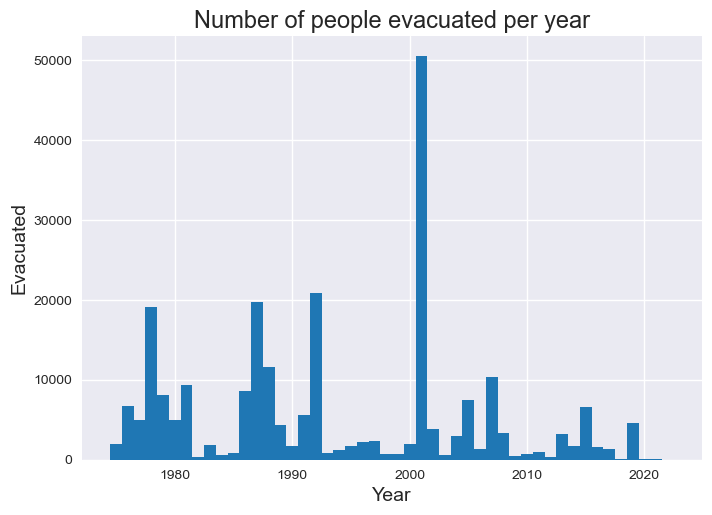

In [96]:
plt.bar(evac_df['Date'], evac_df['Evacuated'], color='tab:blue', width=1)
plt.style.use('seaborn')
plt.title('Number of people evacuated per year', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Evacuated', fontsize=14)

plt.show()

### Creating another dataframe for people killed per year

In [97]:
rrgb = df.groupby(df.Date.dt.year)['Killed'].sum()

In [98]:
killed_df = rrgb.reset_index()

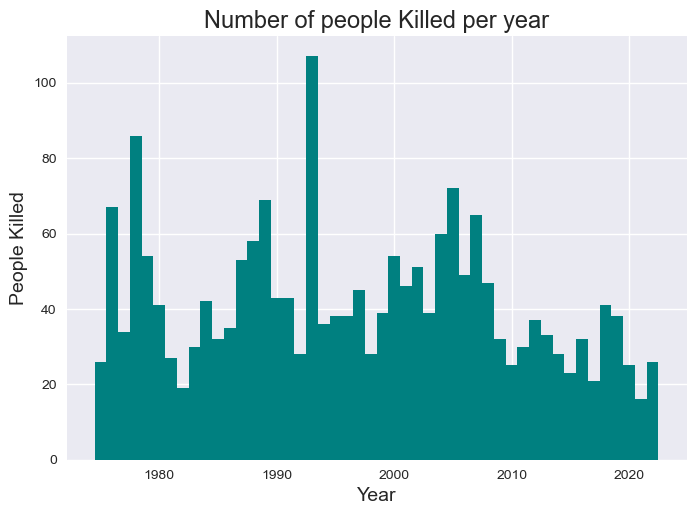

In [99]:
plt.bar(killed_df['Date'], killed_df['Killed'], color='teal', width=1)
plt.style.use('seaborn')
plt.title('Number of people Killed per year', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.ylabel('People Killed', fontsize=14)

plt.show()

### Reading in my by state derailment count csv

In [100]:
df2 = pd.read_csv('assets/rr_derailment_map.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

### Plotting the count csv to a choropleth

In [101]:
fig = px.choropleth(df2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total Derailments',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.update_layout(
      title_text = 'Derailments by State',
      title_font_family="Times New Roman",
      title_font_size = 33,
      title_font_color="black", 
      title_x=0.49, 
         )
fig.show()

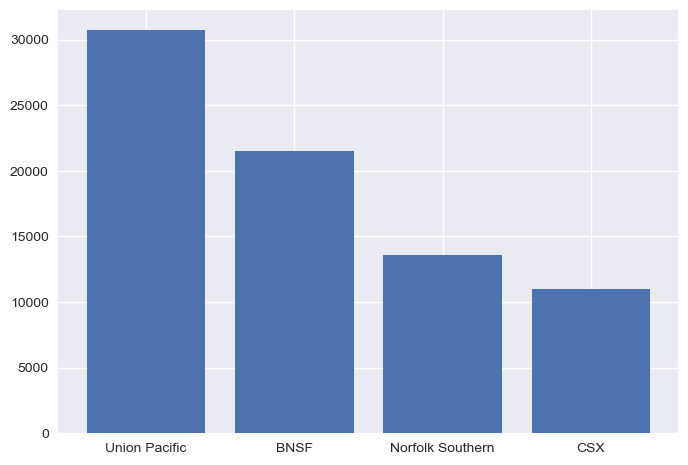

In [102]:
railroad_derailments = {'Union Pacific': 30733, 'BNSF': 21488, 'Norfolk Southern': 13617, 'CSX': 10956,  }
Railroad = list(railroad_derailments.keys())
Derailments = list(railroad_derailments.values())

plt.bar(range(len(railroad_derailments)), Derailments, tick_label=Railroad)
plt.show()